In [1]:
%matplotlib inline

In [2]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict
from retrosheet_util import RetroSheetUtil

In [3]:
# データフレームを読み込む
df = pd.read_csv('./data/ichiro_suzuki_2010_hits.csv')

In [4]:
# データを表示(Ichiro Suzuki 2010 batting)
df

,game_id,event_id,event_cd,pitch_seq_tx,event_tx,bat_play_tx,battedball_cd,battedball_loc_tx
0,OAK201004050,19,20,CFBFFFX,S8/G,NaN,G,NaN
1,OAK201004060,1,20,CFX,S7/L,NaN,L,NaN
2,OAK201004070,41,20,BCX,S9/G.1-3,NaN,G,NaN
3,TEX201004090,1,21,BBX,DGR/9/F,NaN,F,9
4,TEX201004090,40,20,BCX,S14/G,NaN,G,NaN
5,TEX201004100,54,20,1BX,S8/F-.1-2,NaN,F,NaN
6,TEX201004100,73,20,X,S8/L.3-H;2-3,NaN,L,NaN
7,TEX201004110,1,20,CBX,S8/L,NaN,L,NaN
8,SEA201004140,38,20,BCBCBX,S2/G-,NaN,G,NaN
9,SEA201004140,66,20,CFFBBX,S9/L,NaN,L,NaN


In [5]:
# 条件ごとにサマリーを出してみる

# ポジションごとの打球数
atbat_count = {
    'event': {},
    'position': {},
    'battedball': {},
}
# 打席情報
atbats = {
    'event': [],
    'position': [],
    'battedball': [],
}

# ポジションごとの打球カウント
HITS_DICT = {
    'HR' : 'Homerun',
    'T': 'Triple',
    'D': 'Double',
    'S': 'Single'
}
hit_keys = ('Homerun', 'Triple', 'Double', 'Single')
# 外野
of_pos_dict = OrderedDict()
for pos in ('7', '78', '8', '89', '9'):
    hits = OrderedDict()
    for key in hit_keys:
        hits[key] = 0
    of_pos_dict[pos] = hits

for i, row in df.iterrows():
    row_dict = row.to_dict()
    atbat = RetroSheetUtil.get_atbat(row_dict['event_tx'], row_dict['event_cd'], row_dict['battedball_cd'])
    for key in atbats.keys():
        atbats[key].append(atbat[key])
        if atbat[key] in atbat_count[key] :
            atbat_count[key][atbat[key]] += 1
        else:
            atbat_count[key][atbat[key]] = 1
    # ground rule doubleを普通のdoubleに読み替え
    if atbat['event'] == 'DGR':
        atbat_event = 'D'
    else:
        atbat_event = atbat['event']
    if atbat['position'] in of_pos_dict.keys():
        of_pos_dict[atbat['position']][HITS_DICT[atbat_event]] +=1

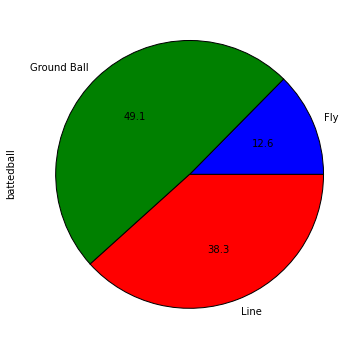

In [7]:
# 打球種類の分布
dfcnt = pd.DataFrame(atbat_count)
batted_balls = dfcnt.battedball.dropna()
batted_balls.plot(kind='pie', labels=['Fly', 'Ground Ball', 'Line'], autopct='%.1f', figsize=(6,6))

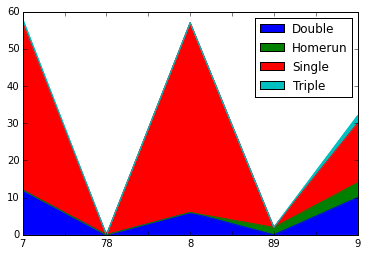

In [8]:
# 外野に飛んだ打球の分布
# 7:左翼 8:中堅 9:右翼 78:左中間 89:右中間

dfpos = pd.DataFrame(of_pos_dict)
dfpos.T.plot(kind='area', sort_columns=False)